In [5]:
from typing import Any
from torch.utils.data import Dataset
import numpy as np

import cv2
import glob
from tqdm import tqdm 
import pandas as pd 
import os, sys
from PIL import Image

import numpy as np
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add the parent directory to the Python path
sys.path.append(parent_dir)
print(sys.path)
from tools import BreaKHis
from torchvision import transforms
from PIL import Image
import torch 
import matplotlib.pyplot as plt

['c:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\breast_histopathology_clf\\notebooks', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\python38.zip', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\DLLs', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\lib', 'c:\\Users\\user\\anaconda3\\envs\\breakkit', '', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\lib\\site-packages', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\lib\\site-packages\\win32', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\lib\\site-packages\\win32\\lib', 'c:\\Users\\user\\anaconda3\\envs\\breakkit\\lib\\site-packages\\Pythonwin', 'c:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\breast_histopathology_clf\\notebooks', 'c:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\breast_histopathology_clf\\notebooks', 'c:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\breast_histopathology_clf\\notebooks', 'c:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\breast_histopathology

In [118]:
myDataset = BreaKHis(root='C:\\Users\\user\\Dersler\\Machine and Deep Learning\\Project\\BreaKHis_v1\\',
                transform=transforms.Compose([
                        transforms.ToTensor(),
                    ]),
                    mf= '400X'
)

100%|██████████| 1232/1232 [00:23<00:00, 52.42it/s]
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


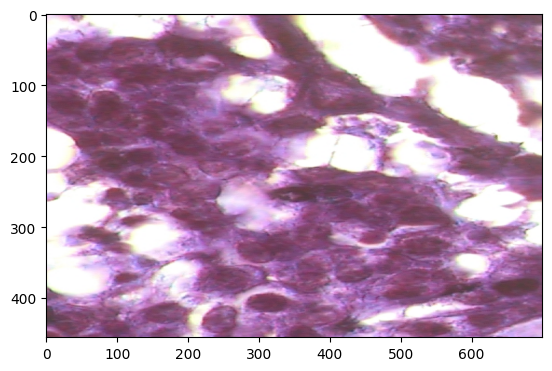

In [119]:
img = myDataset[0][0]
img = torch.transpose(img, 0, -1)
plt.imshow(img)

In [120]:
# Calculate the mean pixel value of each channel
print(myDataset.images.shape)
channel_means = np.mean(myDataset.images, axis=(0, 1,2))
print(channel_means)

(1820, 700, 456, 3)
[189.29987849 150.37759536 192.78031155]


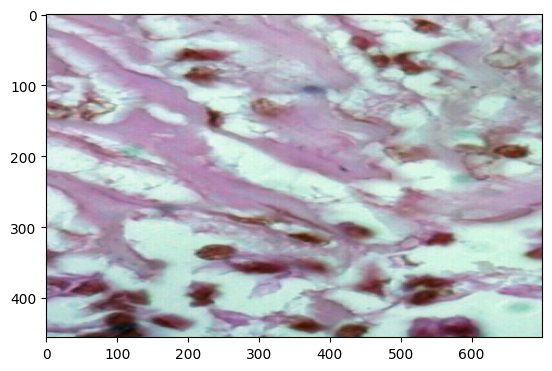

In [121]:
def scale_decimal(image):
    image = np.array(image)
    # Scale the image between 0 and 255 for each channel
    scaled_image = np.zeros_like(image, dtype=np.float32)
    for c in range(image.shape[2]):
        channel = image[..., c]
        scaled_channel = (channel - np.min(channel)) * (1 / (np.max(channel) - np.min(channel)))
        scaled_image[..., c] = scaled_channel
    return scaled_image

img = myDataset[15][0]
img = torch.transpose(img, 0, -1)
scaled = scale_decimal(img - channel_means)
plt.imshow(scaled)

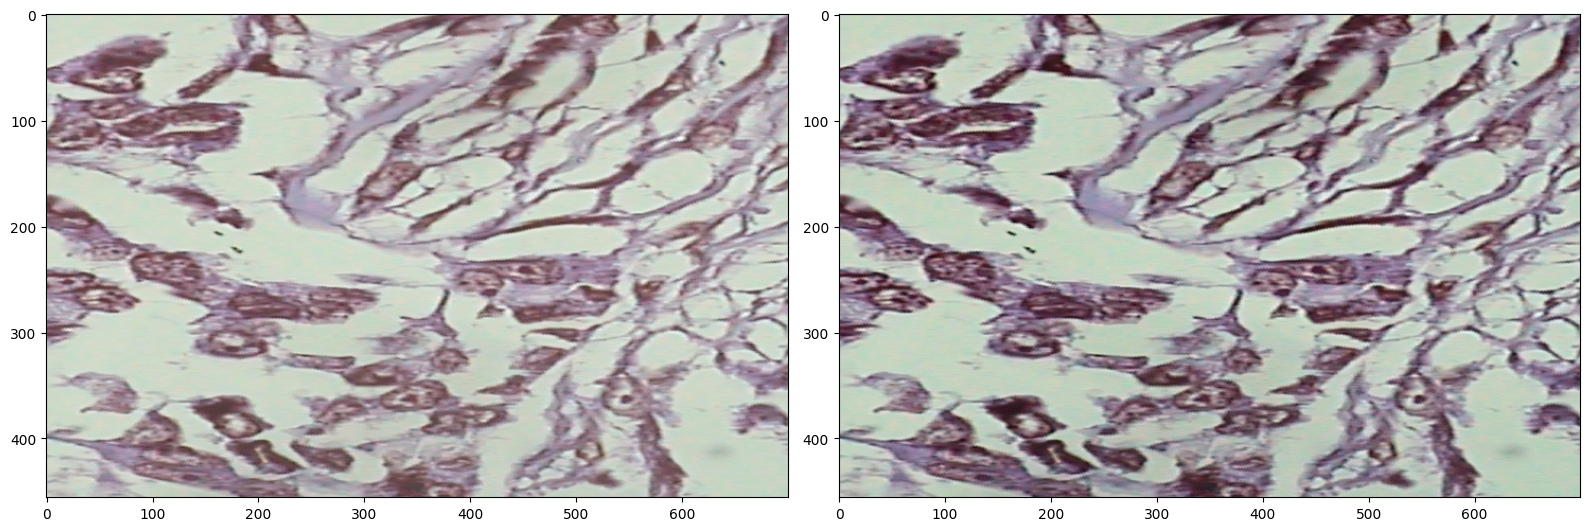

In [122]:
img = myDataset[3][0]
img = torch.transpose(img, 0, -1)
scaled = scale_decimal(img - channel_means/255)
fig, axs = plt.subplots(1,2, figsize=(16,16))
axs = axs.ravel()

axs[0].imshow(img)
axs[1].imshow(scaled)
plt.tight_layout()
plt.show()

In [123]:
img.shape

torch.Size([456, 700, 3])